In [39]:
import numpy as np 
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('diabetic.csv')

In [125]:
def km(t):  
    n = len(time)
    T = time[time<t]
    S = status
    P = 1
    for i in range(len(T)):
        P= P* (1-S[i]/(n-i))
    return P

In [147]:
V = np.array([4,7,2])
S = np.array([0,1,0])

S[np.argsort(V)]
np.argsort(V)

array([2, 0, 1])

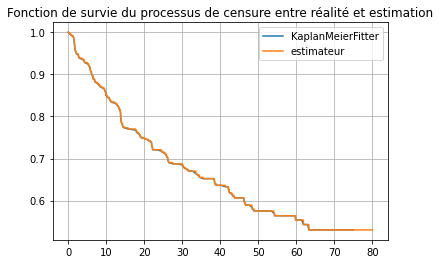

In [137]:
time = df.time.values
status = df.status.values[np.argsort(time)]
time = np.sort(time)  

Ti = np.linspace(0,80,1000)  
Y = np.array([km(t) for t in Ti])

# Création du modèle Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustement du modèle avec les données
kmf.fit(time, status)

plt.plot(kmf.survival_function_, label='KaplanMeierFitter')
plt.plot(Ti,Y,label='estimateur')
plt.grid()
plt.title("Fonction de survie du processus de censure entre réalité et estimation")
plt.legend()

# Avec des données simulées 

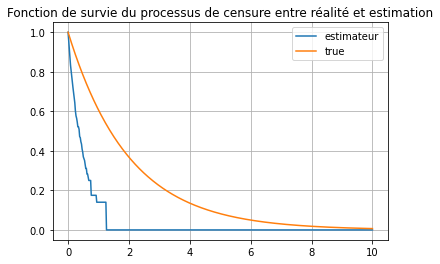

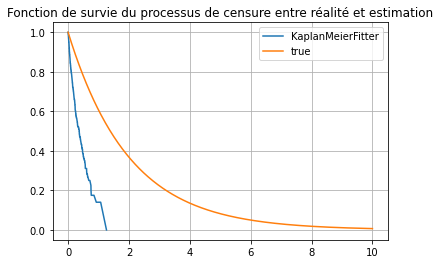

In [155]:
import numpy.random as npr

a = 1/2
b = 1/4
N=1000

X = npr.exponential(a, N)
C = npr.exponential(b,N)


time = np.array([min(X[i],C[i]) for i in range(N)])
status = (time == X).astype(int)

status = status[np.argsort(time)]
time = np.sort(time)

Ti = np.linspace(0,10,500)  
Y = np.array([km(t) for t in Ti])
Y_true = np.array([np.exp(-a*t) for t in Ti])

plt.plot(Ti,Y,label='estimateur')
plt.plot(Ti,Y_true,label='true')
plt.grid()
plt.title("Fonction de survie du processus de censure entre réalité et estimation")
plt.legend()
plt.show()

# Création du modèle Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustement du modèle avec les données
kmf.fit(time, status)


plt.plot(kmf.survival_function_, label='KaplanMeierFitter')
#plt.plot(Ti,Y,label='estimateur')
plt.plot(Ti,Y_true,label='true')
plt.grid()
plt.title("Fonction de survie du processus de censure entre réalité et estimation")
plt.legend()
plt.show()